<a href="https://colab.research.google.com/github/chihchao/application-of-programming/blob/main/machine_learning_california_housing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 加州房價資料集（California Housing）

加州房價資料集是一個廣泛使用的機器學習資料集，用於預測加州不同地區房屋價格的中位數。此資料集包含了1990年加州的所有普查區域，共20640個實例。每個實例包含了8個特徵：人口中位數、房屋總數、臥室總數、年收入中位數、房屋價值中位數、海拔、緯度和經度。這些特徵被用來預測該地區房屋價格的中位數。

此資料集廣泛應用於機器學習領域，特別是在迴歸問題上。許多機器學習演算法和模型都使用該資料集進行訓練和測試，例如線性迴歸、決策樹、隨機森林、神經網路等。該資料集也經常用於教學和研究目的，因為它簡單易懂，且包含了多種類型的特徵和一個具有挑戰性的回歸任務。

`California Housing Dataset` 是一個關於加州各地區（block group）的房價資料集，通常用於回歸問題的練習。該資料集包含了多個特徵，用來預測每個區域的中位數房價（`MedHouseVal`）。下面是這些特徵的詳細解釋：

### 1. `MedInc` — 中位數收入 (Median Income)
這個特徵表示每個區域的中位數收入，單位為每年收入的千美元。它反映了該地區居民的經濟水平，通常與該區域的房價有高度相關性。

### 2. `HouseAge` — 房屋年齡 (House Age)
這個特徵表示該區域內所有房屋的年齡的中位數（即建築年齡）。年齡較大的房屋可能會影響該區域的房價，因為較舊的房屋需要更多的維護或翻修。

### 3. `AveRooms` — 平均房間數 (Average Rooms)
此特徵表示該區域內每個住宅的平均房間數。更多的房間數通常意味著更大的房屋，這會影響房價。

### 4. `AveOccup` — 平均住戶數 (Average Occupants)
此特徵表示該區域內每個住宅的平均住戶數。住戶數量較多的房屋可能需要更大的空間，進而影響該地區的房價。

### 5. `Lat` — 緯度 (Latitude)
該特徵表示區域的緯度位置。加州的緯度從南到北變化，這可能影響該區域的氣候、地理位置及其經濟特徵，從而影響房價。

### 6. `Long` — 經度 (Longitude)
此特徵表示該區域的經度位置。經度影響該區域的地理位置，同樣也會影響當地的房價，尤其是與城市距離的關聯性。

### 7. `MedHouseVal` — 中位數房價 (Median House Value)
這是目標變數，表示每個區域的中位數房價（以千美元為單位）。這是我們要預測的變數。

### 8. `Population` — 人口數 (Population)
這個特徵表示每個區域（或區塊組）內的總人口數量。人口數量影響社會和經濟活動，通常在人口密度較高的地區，房價也可能會相對較高。此外，人口數量也能反映該地區的需求，進一步影響房價。

在進行數據探索分析時，這個特徵可以和其他變數（例如 `MedInc`、`HouseAge`）進行比較，來了解人口數量與房價的潛在關係。例如，人口較多的區域可能會有較高的需求和更高的房價。


In [1]:
import pandas as pd
from sklearn.datasets import fetch_california_housing

# 載入資料集
california_housing = fetch_california_housing()

# 將資料轉換為 pandas DataFrame
df = pd.DataFrame(california_housing.data, columns=california_housing.feature_names)

# 加入目標值 (房價中位數)
df['MedHouseVal'] = california_housing.target

# 顯示資料的前幾筆
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [8]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [4]:
df.isnull().sum()

,0
MedInc,0
HouseAge,0
AveRooms,0
AveBedrms,0
Population,0
AveOccup,0
Latitude,0
Longitude,0
MedHouseVal,0


In [ ]:
import matplotlib.pyplot as plt

# 繪製各特徵的直方圖
df.hist(bins=50, figsize=(20, 15))
# plt.show()

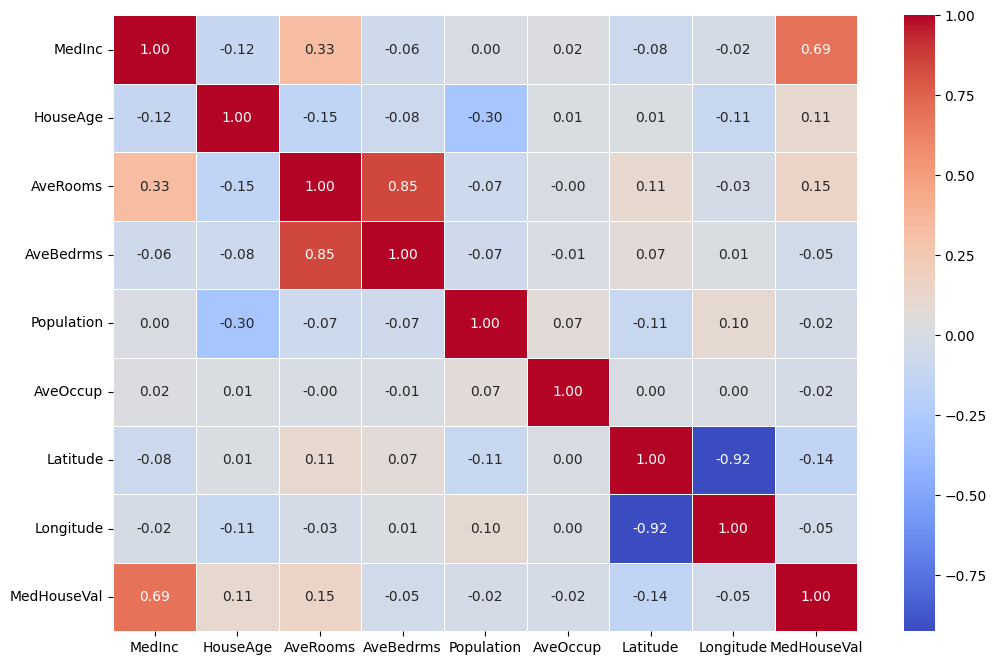

In [10]:
import seaborn as sns

# 計算相關係數矩陣
corr_matrix = df.corr()

# 繪製熱圖來顯示特徵之間的相關性
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.show()

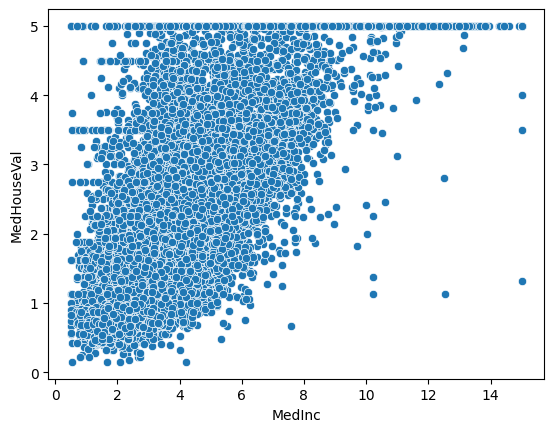

In [11]:
# 散點圖顯示特徵與房價的關係
sns.scatterplot(x='MedInc', y='MedHouseVal', data=df)
plt.show()

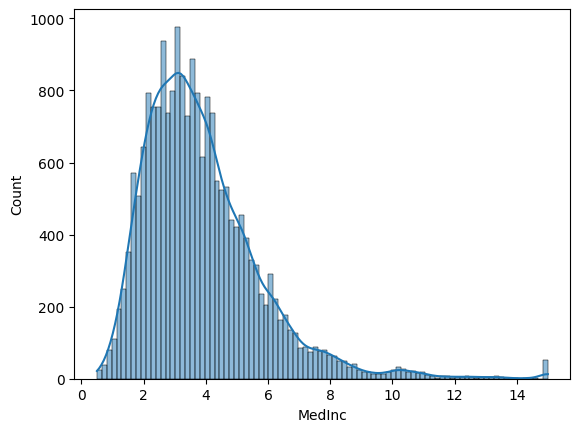

In [13]:
# 直方圖與核密度估計
sns.histplot(df['MedInc'], kde=True)
plt.show()

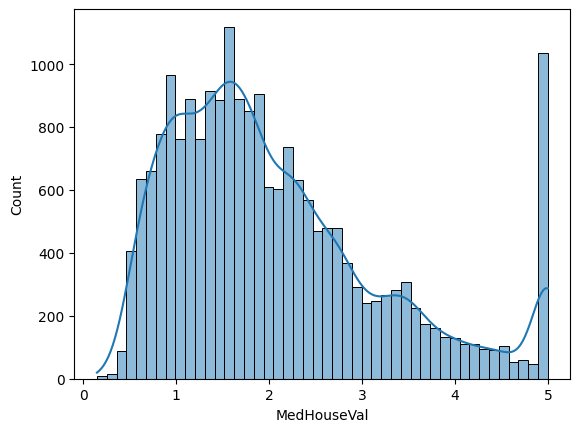

In [14]:
# 查看房價（MedHouseVal）的分佈
sns.histplot(df['MedHouseVal'], kde=True)
plt.show()

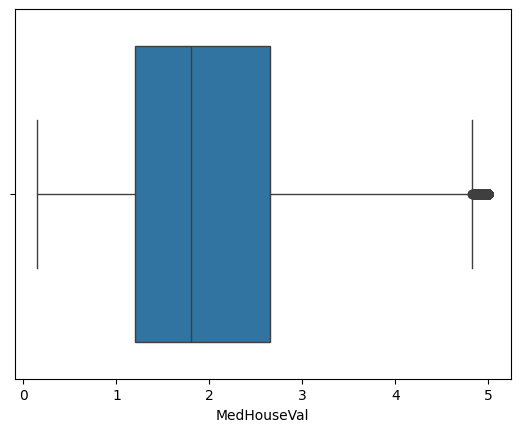

In [15]:
# 檢查 MedHouseVal (中位數房價) 的異常值
sns.boxplot(x=df['MedHouseVal'])
plt.show()


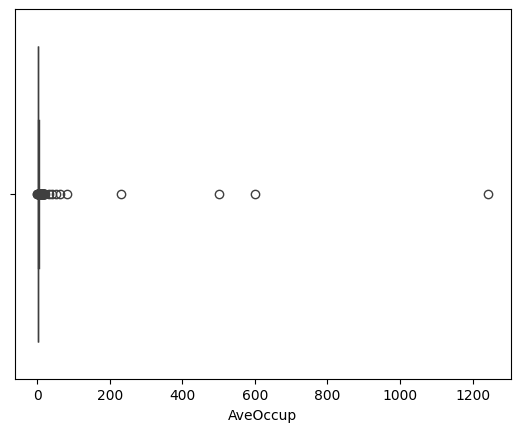

In [16]:
# 檢查 AveOccup (中位數房價) 的異常值
sns.boxplot(x=df['AveOccup'])
plt.show()


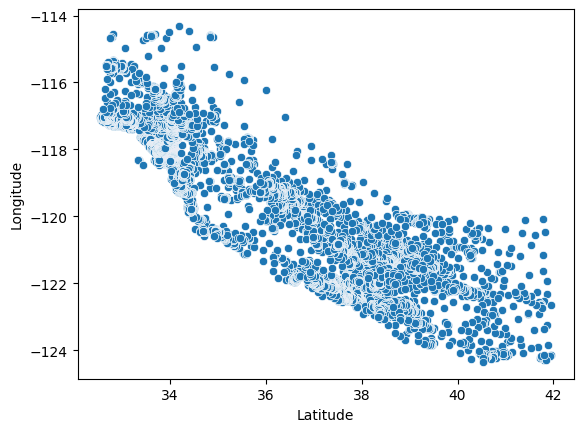

In [18]:
# 散點圖顯示地理位置
sns.scatterplot(x='Latitude', y='Longitude', data=df)
plt.show()

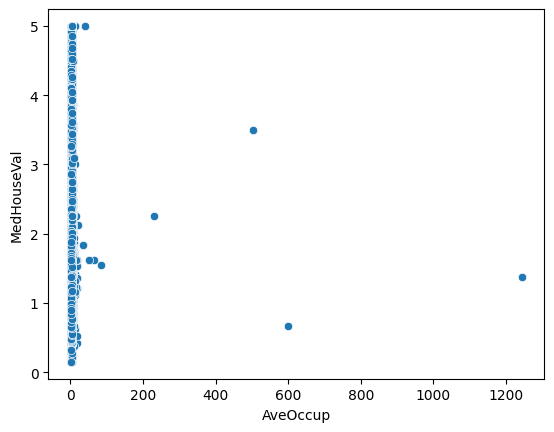

In [17]:
# 散點圖顯示特徵與房價的關係
sns.scatterplot(x='AveOccup', y='MedHouseVal', data=df)
plt.show()

In [21]:
# 分割資料為訓練集和測試集，80% 作為訓練集，20% 作為測試集
from sklearn.model_selection import train_test_split
X = df.drop('MedHouseVal', axis=1)  # 特徵
y = df['MedHouseVal']  # 目標變數
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [22]:
from sklearn.linear_model import LinearRegression
# 建立線性迴歸模型
model = LinearRegression()

# 訓練模型
model.fit(X_train, y_train)


LinearRegression()

In [24]:
from sklearn.metrics import mean_squared_error, r2_score
# 預測測試集
y_pred = model.predict(X_test)

# 計算均方誤差 (MSE) 和決定係數 (R²)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R²: {r2}")


Mean Squared Error: 0.5558915986952444
R²: 0.5757877060324508


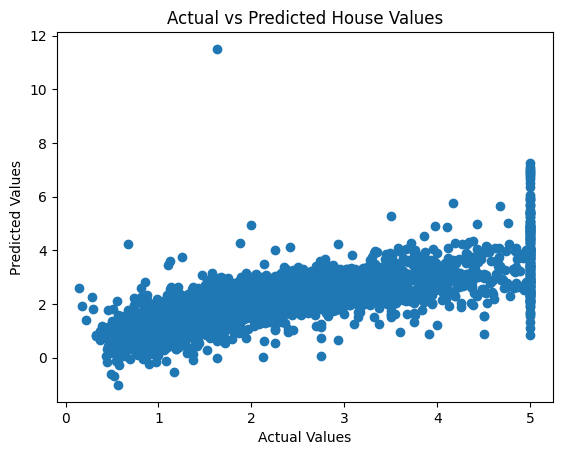

In [25]:
import matplotlib.pyplot as plt
# 繪製實際值與預測值的散點圖
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted House Values')
plt.show()


In [ ]:
MedInc	HouseAge	AveRooms	AveBedrms	Population	AveOccup	Latitude	Longitude	MedHouseVal

In [29]:
import pandas as pd
import numpy as np

# 假設我們的虛擬資料（包含所有訓練用的特徵）
data = {
    'MedInc': [8.0],        # 中位數收入
    'HouseAge': [30.0],     # 房屋年齡
    'AveRooms': [6.0],      # 平均房間數
    'AveBedrms': [2.0],     # 平均臥室數
    'Population': [1000],    # 人口數
    'AveOccup': [3.0],      # 平均住戶數
    'Latitude': [37.0],     # 緯度
    'Longitude': [-122.0]  # 經度
}

# 使用 pandas 創建 DataFrame，並確保特徵名稱與訓練時一致
virtual_df = pd.DataFrame(data)

# 顯示虛擬資料
print(virtual_df)

# 使用訓練好的模型進行預測
predicted_house_value = model.predict(virtual_df)

# 顯示預測結果
print(f"預測的中位數房價 (MedHouseVal) 為: ${predicted_house_value[0]*1000:.2f}")


   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0     8.0      30.0       6.0        2.0        1000       3.0      37.0   

   Longitude  
0     -122.0  
預測的中位數房價 (MedHouseVal) 為: $5051.65
